# INFN ML Course: Hands On

## Structure of this Hands On

This tutorial is targetting HEP researchers with some familarity with Python and aiming to learn enough Data Science, Machine Learning, and Deep Learning to apply the emerging tools and techniques to their research. The tutorial is organized into two threads. The primary thread, contained in this notebook, leads you through a typical HEP problem (a SUSY search with reconstructed objects), utilizing various python-based packages. As each package is introduced, you have an option of jumping to a concurrent thread consisting of notebooks that aim to give a brief primer for each package.

Note that like most HEP tutorials, there are many sections where you can simply follow the instructions and execute example code like a robot (usualy via copy/paste into a terminal, but in this case using Jupyter notebooks). But this tutorial also aims to teach you key concepts in scientific computing, Machine Learning, and Deep Learning in python through exercises that require you to slow down, think critically, and apply what you read. We encourage you to try to work through the exercises, but you'll notice that you will find solutions in hidden cells for some of the exercises.

The tutorial is divided into three sections: (TO BE UPDATED)

A. <a href='#Basics'>Basics</a>
   1. <a href='#Jupyter'>Notebooks</a>
   2. <a href='#Numpy'>Numpy</a>
   3. <a href='#HDF5'>HDF5</a>
   
B. <a href='#MachineLearning'>MachineLearning</a>
   1. <a href='#Dataset'>Dataset</a>
   2. <a href='#Pandas'>Pandas</a>
   3. <a href='#Scikit-learn'>Scikit-learn</a>

C. <a href='#DeepLearning'>DeepLearning</a>
   1. <a href='#Keras'>Keras</a>


<a id='Basics'></a>
# A. Basics

Data Science in python usually starts with loading data into numpy tensors for manipulation in an interactive python session. While you can run the session in a terminal, interactive notebook systems (e.g. Jupyter) provide a nice web-based alternative environment for data analysis. These environments allow you to combine text, code, and results all in one interactive document in your browser. 



<a id='Notebooks'></a>
## 1. Python Notebooks

You are currently using [Google Colab](https://colab.research.google.com), which is a service hosted by Google that gives free access to computing resources (including GPUs) via a custom notebook environment. You can easily run a very similar system on your own laptop or computing resources using [Jupyter](https://jupyter.org).  An important note about Colab: if the sessions are currently in was spawned off of github, your notebook will be not saved and you will loose everything if you close your browser. The easiest way of persisting your notebooks is to copy them to your Google Drive by pressing the "COPY TO DRIVE" button above. 

Notebooks consist of cells that can hold text or code (usually python). This text that you are reading, was written into a text cell as simple text "coding" language known as Markdown. When this cell is run (either automatically at start of the notebook or manually by pressing shift-enter), the Markdown text is interpreted into nice looking text. Running a code cell will execute the code in that cell and give you the results. If you make a mistake, you can usually simply change the cell and re-run. But be aware that since you ran the mistaken cell already, whatever code was properly executed before your mistake/error, was already executed and has therefore changed your current python environment accordingly. In some cases this situation will be problematic, and you will need to rerun the notebook from the start by pressing restarting the Runtime (in Colab) or pressing the "reload" botton (next to the "stop" button) (in Jupyter).

You are encouraged to add cells to this notebook (using the "+" button(s) on the tool bar) and play around a bit. 

## Notebook Basics

### Text Cells and Markdown
You can write whatever you like into text cells. If you double-click on this cell, you'll be able to edit the Markdown that generates what is displayed once you run a text cell (e.g. using shift-enter). Once editting a cell, Colab gives you some buttons on top to help with formatting of the text. Jupyter usually doesn't. But Markdown is an easy language to master. See [this table](https://en.wikipedia.org/wiki/Markdown#Example) for a table that shows how to format text in Markdown.

### Code Cells

Whatever code you type into a code cell is executed by the notebook in a common python runtime instance that persists during your session, when you run that cell. For example, select the next cell and press shift-enter:

In [18]:
print "Hello World"

Hello World


You can execute shell commands in a code cell by starting a line with an exclamation mark "!" (aka "bang"). For example

In [20]:
!touch A_File
!ls 

 A_File  'rows.csv?accessType=DOWNLOAD'   sample_data


### Exercise A.1.1

Later in this tutorial, we will attempt to follow the first paper on Deep Learning in High Energy physics by P. Baldi, et al. This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios. We will focus on the SUSY benchmark. 

The dataset is somewhat large and takes time to decompress, so let's download it and decompress it.

Execute the following cell to use `wget` to download and decompress the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). If you are running in Google Drive, the data will be downloaded there. Note that you should only run this cell once... so we recommend you comment out the contents of the cell (using hash marks "#" on each line) to avoid redownloading the data every time you run this notebook.

In [12]:
# On MacOS:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

# Elsewhere:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
  
!gunzip SUSY.csv.gz

!ls


--2019-05-16 10:54:52--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922377711 (880M) [application/x-httpd-php]
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz         100%[===================>] 879.65M  44.7MB/s    in 21s     

2019-05-16 10:55:12 (42.7 MB/s) - ‘SUSY.csv.gz’ saved [922377711/922377711]

sample_data  SUSY.csv


You can look at the contents of the file using the unix `head` command and count the number of lines using the unix `wc` command:

In [24]:
!head -5 SUSY.csv
!wc -l SUSY.csv


0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### Exercise A.1.2

The SUSY dataset has 5 million examples (events), which is unnecessarily big for most of the ML algorithms we will be training. Use the unix `head` command and shell redirection to create a smaller file called "SUSY-small.csv" of 500,000 events.

In [0]:
# Your solution here

In [13]:
#@title
!head -500000 SUSY.csv > SUSY-small.csv
!wc -l SUSY-small.csv

500000 SUSY-small.csv


<a id='Numpy'></a>
## 2. Numpy

[Numpy](http://www.numpy.org) is the tensor manipulation package most commonly used in python-based scientific computing. Numpy tensor interface is also adopted by all packages that provide tensors (e.g. h5py, theano, TensorFlow, ...). You can use numpy as a Linear Algebra package like Matlab. Take a quick read of [Linear Algebra with Numpy](https://github.com/afarbin/INFN-ML-Course/blob/master/Numpy-Linear-Algebra.ipynb) to familiarize yourself with numpy. 

The size of a `numpy` tensor is encapsulated in its "shape" which is a tuple with length corresponding to the tensor's rank and each element specifying the size of each dimension. For example a tensor with shape (3,3) is a 3-by-3 matrix. 

Here's an example:

In [1]:
import numpy as np

A= np.array([[ 1, 2, 3, 4], [ 5, 6, 7, 8], [ 9, 10, 11, 12]])

print "A = ",A

print "Shape of A ", A.shape

print "Length of shape of A ", len(A.shape)

A =  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape of A  (3, 4)
Length of shape of A  2


And some examples of tensor manipulations that will help you with the exercises below:

In [16]:
print "Transpose of A:"
print A.transpose()

B = A.reshape(2,6)

print "A reshaped into tensor B with shape (2,6):"
print B

print "Sum of A:", np.sum(A)

print "Sum of A along axis 0:"
print np.sum(A,axis=0)

print "Sum of A along axis 1:"
print np.sum(A,axis=1)

print "Mean of B along axis 1:"
print np.mean(B,axis=1)

print "Multply A by a constant (2):"
print 2*A

print "Add constant 1 to every element of A:"
print A+1

Transpose of A:
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]
A reshaped into tensor B with shape (2,6):
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
Sum of A: 78
Sum of A along axis 0:
[15 18 21 24]
Sum of A along axis 1:
[10 26 42]
Mean of B along axis 1:
[3.5 9.5]
Multply A by a constant (2):
[[ 2  4  6  8]
 [10 12 14 16]
 [18 20 22 24]]
Add constant 1 to every element of A:
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]



For more examples of creating and manipulating `numpy` tensors, we encourage you to read through this excellent [numpy walkthrough](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb) at some other time.

### Exercise A.2.1

Lets start with some basic reshape manipulations. Consider a classification task. We can imagine the training data X consisting of N examples each with M inputs, so the shape of X is (M,N). The output of the Neural Network for the training sample encodes the true class of each of the N examples in X, in a "one-hot" matrix of shape (N,C), where C is the number of classes and each row corresponds to the true class for the corresponding example in X. So for a given row Y[i], all elements are 0 except for the column corresponding to the true class.

For example consider a classification task of separating between 4 classes. We'll call them A, B, C, and D.


In [0]:

Y=np.array( [ [0, 1, 0, 0], # Class B
              [1, 0, 0, 0], # Class A
              [0, 0, 0, 1], # Class C
              [0, 0, 1, 0]  # Class D
            ])

print "Shape of Y:", Y.shape

Lets imagine that we want to change to 2 classes instead by combining classes A with B and C with D. Use `np.reshape`, `np.sum`, and possibly `np.transpose` to create a new vector Y1. Hint: change the shape of Y into (8,2), sum along the correct axes, and change shape to (4,2). 

In [0]:
# Your solution here

In [0]:
#@title
print "Transpose:", np.transpose(Y)
print "Reshape 8,2:", np.transpose(Y).reshape((8,2))
print "Sum:", np.sum(np.transpose(Y).reshape((8,2)),axis=1)

Y1= np.sum(np.transpose(Y)
           .reshape((8,2)),axis=1).reshape(4,2)
print "Answer: ",Y1

### Exercise A.2.2

Oftentimes we find that neutral networks work best when their input is mostly between 0 and 1. Below, we create a random dataset that is normal distributed (mean of 4, sigma of 10). Shift the data so that the mean is 0.5 and 68% of the data lies between 0 and 1. 

In [0]:
X=np.random.normal(4,10,1000)
print np.mean(X)
print np.min(X)
print np.max(X)
print np.var(X)

In [0]:
# Your solution here

In [0]:
#@title
import math
X1=(X-np.mean(X))/math.sqrt(np.var(X)) # Replace X with your answer

print np.mean(X1)
print np.var(X1)

<a id='MachineLearning'></a>
# B. Machine Learning

For the remainder of this tutorial, we will attempt to follow the first paper on Deep Learning in High Energy physics [P. Baldi, et al](https://arxiv.org/pdf/1402.4735.pdf). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used for searches for exotics particles. The authors publically provide the two benchmark scenarios considered in the paper. We will focus on the SUSY benchmark. 

<a id='Dataset'></a>
## 1. The Dataset

The data is distributed as a comma separated values (CSV) file:

In [14]:
# Note filenames are defined in cell at top of this tutorial

# print out the first 5 lines using unix head command (note in jupyter ! => shell command)
SUSY_filename="SUSY-small.csv"
!head -5 $SUSY_filename

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are:

In [0]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [0]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
FeatureNames=[ "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

<a id='Pandas'></a>
## 2. Pandas

CSV is a common data format in Data Science, and there are lots of tools for loading them into memory in python. For a walk-through of some of these tools, please go through [Data Preparation Load Dataset notebook](https://github.com/afarbin/INFN-ML-Course/blob/master/DataPreparation__LoadDataset.ipynb).

We will use [pandas](http://pandas.pydata.org) to read in the file, and [matplotlib](https://matplotlib.org) to make plots. Pandas provides "data structures and data analysis tools for the Python Programming Language". Pandas is a powerful library with lots of features, but for us here, pandas just makes it very easy to read a CSV file.

The following ensures pandas is installed and sets everything up:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe. It's a ~GB file, so be patient.

In [0]:
df = pd.read_csv(SUSY_filename, dtype='float64', names=VarNames)

Another nice feature of pandas is that you can see the data in Jupyter by just evaluating the dataframe:

In [0]:
df

The first column stores the "truth" label of whether an event was signal or background. Pandas makes it easy to create dataframes that store only the signal or background events:

In [0]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label. 

We will use matplotlib for plotting. There are lots of tutorials and primers out there that you can find searching the web. A good tutorial can be found in the [Scipy Lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html). Look through these on your own time, it is not necessary for doing these exercise. The code below is all you need to know for making histograms with matplotlib.

In [0]:
for var in VarNames[1:]:
    print var
    plt.figure()
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="background",stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

Making 2-D plot is also very easy. For example:

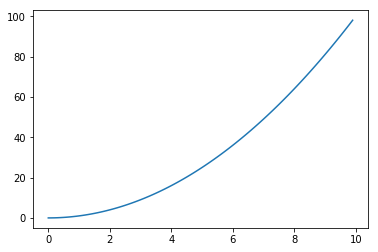

In [4]:
# Make a vector of numbers going from 0 to 10 in steps of .1
X=np.arange(0,10,.1)
# Plot X vs X^2
plt.plot(X,X*X)

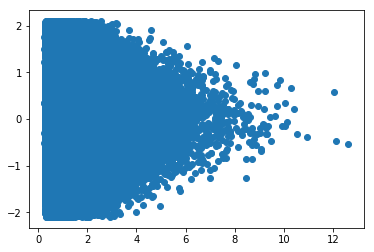

In [21]:
# Scatter plot of lepton pT vs eta
plt.scatter(np.array(df_sig["l_1_pT"]),np.array(df_sig["l_1_eta"]))

<a id='Scikit-learn'></a>
## 3. Scikit-learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. As an example, we can easily build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). The [LDA Documentation](http://scikit-learn.org/stable/modules/lda_qda.html#dimensionality-reduction-using-linear-discriminant-analysis) does as great job explaining this classifier. Here's how we instanciate the classifier: 

In [0]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

Lets separate the data into inputs (X) vs outputs (Y) and training vs testing samples:

In [0]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

We can train the classifier as follow:

In [0]:
Fisher.fit(X_Train,y_Train)

We can plot the output, comparing signal and background:

In [0]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

And we can make a ROC curve and evaluate the AUC:

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise B.3.1

Train the Fisher performance using the raw, features, and raw+features as input. Compare the performance one a single plot. Add cells to this notebook as needed. Or start new notebooks.

In [0]:
X_Train_Raw=Train_Sample[RawNames]
X_Test_Raw=Test_Sample[RawNames]

X_Train_Features=Train_Sample[FeatureNames]
X_Test_Features=Test_Sample[FeatureNames]

In [0]:
def TrainFisher(X_Train,X_Test,y_Train):
    Fisher=DA.LinearDiscriminantAnalysis()
    Fisher.fit(X_Train,y_Train)

    fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return Fisher

RawFisher=TrainFisher(X_Train_Raw,X_Test_Raw,y_Train)
FeatureFisher=TrainFisher(X_Train_Features,X_Test_Features,y_Train)

## Exercise B.3.2

Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Note that you can use the multi-layer peceptron to build a deep network, though training may be prohibitively slow, so avoid this technique. Perform the comparison in exercise 1 for each classifier. Compare your conclusions for your selected techniques to the paper.


## Exercise B.3.3

The following function calculates the significance of the observation of the signal given the number of expected Signal and Background events, using the simple formula $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$. Read through the code carefully.

In [0]:
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)


Answer the following questions:
   * What are we computing when making a normalized cummulative plot? 
   * Assume that the experiment produces 1 signal event for every $10^{11}$ background events. For each of your classifiers, how many signal events need to be produced to be able to make a $5\sigma$ discovery claim?
  

<a id='h5py'></a>
## 4. h5py

[HDF5](https://support.hdfgroup.org/HDF5/) is a "data model, library, and file format for storing and managing data." It is also the most common storage format in data science. [h5py](http://www.h5py.org) provides a python API for HDF5. In most cases, you do not need to know very much about HDF5 or h5py, just how to read/write tensors into/from files, which you can easily pick up from the [h5py Quick Start](http://docs.h5py.org/en/latest/quick.html#quick). We won't be using HDF5 for this tutorial. This section is here as reference for when you do encounter an HDF5 file.

Here's an example of how you can save the data we are using into an h5 file:



In [0]:
import h5py
hf = h5py.File('SUSY.h5', 'w')
hf.create_dataset('Events', data=df)
hf.close()

And here's how you "read" it back:

In [23]:
hf = h5py.File('SUSY.h5')
print hf.keys()

my_data=hf["Events"]

[u'Events']


Note while the data you are reading back is the same, it was stored in a pandas dataframe before and now is in h5 data object. One important difference is that the h5 doesn't actually load the data into memory until you access it, which is can be useful for very large datasets. You can convert the data into a numpy tensor or a pandas dataframe, but then the data will be loaded into memory.

You will also note since the data is saved in binary and not text format, h5 files are much more  space efficient:

In [25]:
!ls -lh

total 2.6G
drwxr-xr-x 1 root root 4.0K May 13 16:48 sample_data
-rw-r--r-- 1 root root 2.3G Feb 14  2014 SUSY.csv
-rw-r--r-- 1 root root  73M May 16 10:58 SUSY.h5
-rw-r--r-- 1 root root 228M May 16 10:56 SUSY-small.csv


<a id='DeepLearning'></a>
# C. Deep Learning

This section is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat section B with Deep Learning.

If you are starting here and have not run the cells above that load the data, you will need to run the following cell: 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
FeatureNames=[ "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(SUSY_filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, you can go back and make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [0]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])

<a id='Keras'></a>
## 1. Keras

Training Deep Learning models can take a very long time. If you have access to a GPU, training with the GPU will be about 2 orders of magnitude faster that training with just the CPU. Unforunately, there are no GPUs on lxplus. But, if you are running this notebook on a system with NVidia GPU(s) properly setup, you can tell Keras to use a specific GPU:

In [34]:
# Since lxplus does not have any GPUs, please DO NOT RUN THIS CELL ON LXPLUS.
# Selecting First GPU in the system

import os

# Selecting GPU manually:
gpu_id= 0

print "Selected GPU:", gpuid

# If Using TensorFlow:
import tensorflow as tf
# CPU Configuation
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# config = tf.ConfigProto(intra_op_parallelism_threads=0,
#                         inter_op_parallelism_threads=0,
#                         allow_soft_placement=True,
#                         device_count={'CPU' : 1, 'GPU' : 0},                                                
#                        )


# Comment if using GPU
config = tf.ConfigProto(intra_op_parallelism_threads=0,
                        inter_op_parallelism_threads=0,
                        allow_soft_placement=True,
                        gpu_options=tf.GPUOptions(visible_device_list="{}".format(gpu_id),
                                                 force_gpu_compatible=True,
                                                 allow_growth=True)
                       )



sess = tf.Session(config=config)  

from keras import backend as K
K.set_session(sess)

Selected GPU: 0


Now we will build a simple model. Note that this is a very small model, so things run fast. You should attempt more ambitious models.

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_dim=18)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


The model has to be compiled. At this time we set the loss function and the optimizer too:

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


Now we train. We are running only 10 epochs in this example. Models may need hundreds of epochs before they stop improving.

In [37]:
history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 500000 samples, validate on 0 samples
Epoch 1/10
500000/500000 [==============================] - 1s 3us/step - loss: 0.5701 - acc: 0.7188
Epoch 2/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4537 - acc: 0.7917
Epoch 3/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4476 - acc: 0.7947
Epoch 4/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4428 - acc: 0.7962
Epoch 5/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4400 - acc: 0.7972
Epoch 6/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4387 - acc: 0.7975
Epoch 7/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4379 - acc: 0.7983
Epoch 8/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4371 - acc: 0.7984
Epoch 9/10
500000/500000 [==============================] - 1s 2us/step - loss: 0.4367 - acc: 0.7988
Epoch 10/10
500000/500000 [=================

The model history keeps track of the loss and accuracy for each epoch. Note that the training above was setup to run on the validation sample at the end of each epoch:

In [38]:
print history.history

{'acc': [0.7188459999885559, 0.7916919999923706, 0.7946920000114441, 0.796232, 0.7971959999923706, 0.7974520000038147, 0.7982539999847412, 0.7984, 0.7987880000114441, 0.7989880000038146], 'loss': [0.5700621849918366, 0.4537163269062042, 0.4475548771743774, 0.44276478160858157, 0.43998680382919314, 0.43867258994102476, 0.43785919576454163, 0.43711278533744813, 0.4366711852760315, 0.43610365325927736]}


You can plot the loss versus epoch:

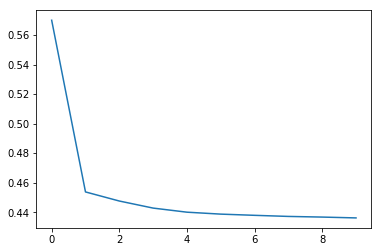

In [39]:
loss_history=history.history["loss"]
plt.plot(range(len(loss_history)),loss_history)

## Exercise C.1.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

    * Has you model's performance plateaued? If not train for more epochs. 

    * Compare the performance on training versus test sample. Are you over training?

In [0]:
## Your Solution Here


## Exercise C.1.2

Explicitly overtrain your model by running for a large number of epochs. Demonstrate that you are over-fitting. Then add dropout layers to your model to alleviate the problem.


## Exercise C.1.3

Following section B, make a comparison of the performance between models trained with raw, features, and raw+features data.

We can evaluate how the trained model does on the test sample as follows:

In [0]:
scores = model.evaluate(X_Test, y_Test)
print scores

And we can make ROC curves as before:

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [0]:
## Your solution here


## Exercise C.1.4

Again, following section B, design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [0]:
## Your solution here

## Exercise C.1.5

Write a function that evaluates the performance (AUC) as a function of a given input variable. You will need to bin the test data in the variable (i.e. make sub-samples for events which have the particular variable in a range), evaluate the performance in each bin, and plot the results.

Apply your function to each input variable.

In [0]:
## Your solution here

# HiggsML Dataset

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML

